In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

plt.rcParams["legend.labelspacing"] = 0.2
plt.rcParams["legend.columnspacing"] = 0.4
plt.rcParams['font.size'] = 28
plt.rcParams['hatch.linewidth'] = 0.3
_figsize=(15,5)
plt.rcParams['axes.linewidth'] = 3
#plt.rcParams['figure.figsize'] = 6,4
_linewidth = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
legend_loc = "upper right"
plt.rcParams['text.color'] = 'black'
keystone_file_path = "iozone.keystone.csv"
baseline_file_path = "iozone.base.csv"
colors=["#FF800E","#006BA4","#ABABAB","#595959","#5F9ED1","#C85200"]
color_for_bars=["#fdfdfd","#FF800E","#006BA4","#ABABAB","#595959","#5F9ED1","#C85200"]
_rotation = 45

data_raw = pd.read_csv("data.csv", delimiter=",")
data_raw = data_raw.sort_values(by=["rocket_small"])
# drop operations


dat0 = data_raw[data_raw.func.str.find("*")>=0].set_index("func").T
dat0 = dat0.drop(["RT_freemem*","SM_dst_cln*","OS_alloc*"], axis=1)

dat1 = data_raw[data_raw.func.str.find("*")<0 ].set_index("func").T
dat1 = dat1.drop(["SM_att(sign)","user_page","SM_att(etc)"], axis=1)

dat0


func          SM_crt(hash)*
rocket_small   7.285774e+06
rocket         4.376974e+06
boom           3.949249e+06
freedom        2.002042e+06

In [11]:
dat1

func          SM_ctxs(all)  SM_dst_etc  RT_boot  SM_crt(etc)
rocket_small       2608.00     3543.80  17318.4     23245.90
rocket             2430.90     3278.20  14024.8     19957.90
boom               2661.80     3550.00  13111.7     17302.80
freedom            1887.55     5416.85  13429.5     30796.75

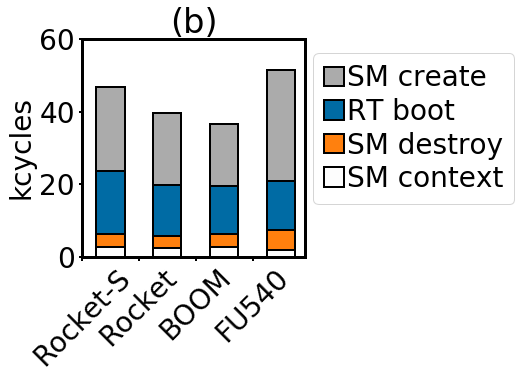

In [14]:
# draw Data 1
plt.figure(figsize=(4,4))
fig = plt.gcf()
barWidth = 0.5
barGap = 0.0
barHatches = ["","//////","......"]
#barlabels = dat1.func

#plt = brokenaxes(ylims=((0, 35000), (720000, 730000),(1010000,1020000)), hspace=.05)

r1 = np.arange(len(dat1))

bar_labels = ["SM context", "SM destroy", "RT boot","SM create"]
bar_ticks = ["Rocket-S","Rocket","BOOM","FU540"]
nextbar = 0

next_bottom = pd.Series([0]*len(dat1),index=["rocket_small","rocket","boom","freedom"])

ax = plt.gca()
#next_bottom = ""

i = 0
for func in dat1.columns:
    ax.bar(r1, dat1[func],
           width=barWidth,
           bottom=next_bottom, 
           label=bar_labels[i], 
           color=color_for_bars[i],
           edgecolor='black',
           linewidth=_linewidth)
    i += 1
    #print (dat1[func].add(next_bottom))
    #print (dat1[func])
    next_bottom = next_bottom.add(dat1[func])
    #to_acc.append(func)
    nextbar += barWidth
    #next_bottom = func
    #break

#ax.legend()
#h, l = ax.get_legend_handles_labels()
#ax.legend(h, l)
#handles, labels = ax.get_legend_handles_labels()
#print (labels)
#ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), ncol=1, loc='upper right',
          handlelength=0.7,bbox_to_anchor=(2.0, 1),handletextpad=0.1)  # reverse to keep order consistent
plt.xticks([x - barWidth for x in r1],bar_ticks,rotation=_rotation)
plt.yticks([0, 20000, 40000, 60000])
ticks = [int(x/1000) for x in ax.get_yticks()]
ax.set_yticklabels(ticks)
plt.ylabel("kcycles")
plt.title("(b)")
fig.savefig("breakdown.pdf", bbox_inches='tight',format="pdf")

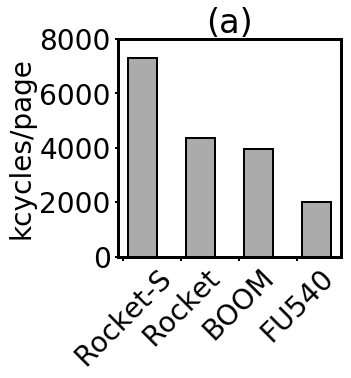

In [16]:
# draw Data 1
plt.figure(figsize=(4,4))
fig = plt.gcf()
barWidth = 0.5
barGap = 0.0
barHatches = ["","//////","......"]
#barlabels = dat1.func

#plt = brokenaxes(ylims=((0, 35000), (720000, 730000),(1010000,1020000)), hspace=.05)

r1 = np.arange(len(dat0))

bar_labels = ["SM measurement"]
bar_ticks = ["Rocket-S","Rocket","BOOM","FU540"]
nextbar = 0

next_bottom = pd.Series([0]*len(dat0),index=["rocket_small","rocket","boom","freedom"])

ax = plt.gca()
#next_bottom = ""

i = 0
for func in dat0.columns:
    ax.bar(r1, dat0[func],
           width=barWidth,
           bottom=next_bottom, 
           label=bar_labels[i], 
           color=colors[2],
           edgecolor='black',
           linewidth=_linewidth)
    i += 1
    #print (dat1[func].add(next_bottom))
    #print (dat1[func])
    next_bottom = next_bottom.add(dat0[func])
    #to_acc.append(func)
    nextbar += barWidth
    #next_bottom = func
    #break

#ax.legend()
#h, l = ax.get_legend_handles_labels()
#ax.legend(h, l)
#handles, labels = ax.get_legend_handles_labels()
#print (labels)
#ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels), ncol=1, loc='best',handlelength=0.7)  # reverse to keep order consistent
plt.xticks([x - barWidth*2/3 for x in r1],bar_ticks,rotation=_rotation)
plt.yticks([0, 2000000, 4000000, 6000000, 8000000 ])
ticks = [int(x/1000) for x in ax.get_yticks()]
ax.set_yticklabels(ticks)
plt.ylabel("kcycles/page")
plt.title("(a)")
fig.savefig("hash.pdf", bbox_inches='tight',format="pdf")

## 